**1. Importing dependencies**

In [66]:
# ==== Importing Required Libraries ====

# Numerical and data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and utilities
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model saving
import pickle


**2. Data processing**

In [67]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#load dataset to panda frame

In [68]:
df.shape
#shows rows and columns

(7043, 21)

In [69]:
#shows first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
pd.set_option("display.max_columns", None)


In [71]:
df.info()
#shows missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
#remove customer ID for not being a feature
df = df.drop(columns=["customerID"])

In [73]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
# Printing the unique values in all non-numerical columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
    if col not in numerical_features_list:
        print(col, df[col].unique())
        print("-" * 50)


gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [75]:
#count missing values in each columns
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [76]:
# Show all rows where the 'TotalCharges' column is an empty string
df[df["TotalCharges"] == " "]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [77]:
len(df[df["TotalCharges"] == " "])

11

In [78]:
# Replace empty string values in the "TotalCharges" column with "0.0"
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0.0")


In [79]:
#change "TotalCharges" datas to float
df["TotalCharges"] = df["TotalCharges"].astype(float)


In [80]:
#recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [81]:
#check class distribution of class columns
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


The CustomerID field was removed because it does not contribute to the predictive modeling task.

The dataset contains no missing values in any columns.

Empty entries in the TotalCharges column were treated as missing and replaced with 0.

A class imbalance was detected in the target variable.

**3. Exploratory Analysis of the Dataset**

In [82]:
df.shape
#nums of rows and cols

(7043, 20)

In [83]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [84]:
#calculate descriptive statistical measures
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Analyze numerical features


Analyze the distribution of the numerical features

In [85]:
def plot_histogram(df, column_name):
    # Create a plot with a defined size
    plt.figure(figsize=(5, 3))

    # Draw the histogram with KDE (smooth curve)
    sns.histplot(df[column_name], kde=True)

    # Add a title showing the selected feature
    plt.title(f"Distribution of {column_name}")

    # Compute basic statistics
    mean_val = df[column_name].mean()
    median_val = df[column_name].median()

    # Mark the mean and median on the graph
    plt.axvline(mean_val, color="red", linestyle="--", label="Mean")
    plt.axvline(median_val, color="green", linestyle="--", label="Median")

    # Display the legend explaining the lines
    plt.legend()

    # Show the final plot
    plt.show()


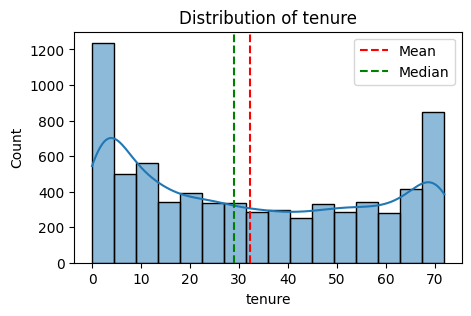

In [86]:
plot_histogram(df, "tenure")

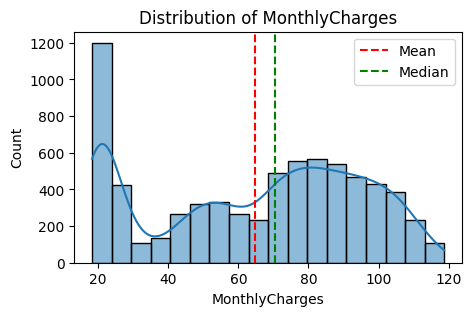

In [87]:
plot_histogram(df, "MonthlyCharges")

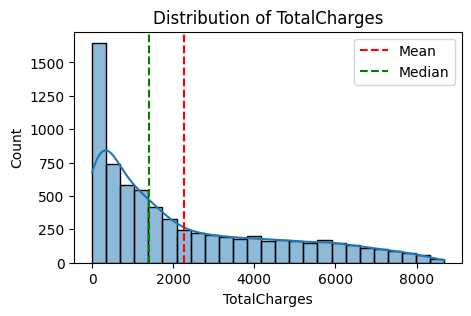

In [88]:
plot_histogram(df, "TotalCharges")

Box plot for numerical features

In [89]:
def plot_boxplot(df, column_name):
    """
    Creates a boxplot for a selected numerical column.
    Helps visualize the distribution, median, and potential outliers.
    """

    # Create a new figure with a fixed size
    plt.figure(figsize=(5, 3))

    # Draw the boxplot for the specified column
    sns.boxplot(y=df[column_name])

    # Add a title describing what feature is being visualized
    plt.title(f"Distribution of {column_name}")

    # Label the y-axis with the column name for clarity
    plt.ylabel(column_name)

    # Display the plot
    plt.show()


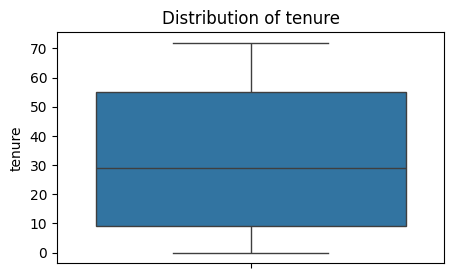

In [90]:
#box plot for tenure
plot_boxplot(df, "tenure")

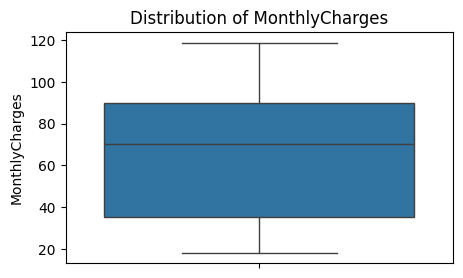

In [91]:
plot_boxplot(df, "MonthlyCharges")

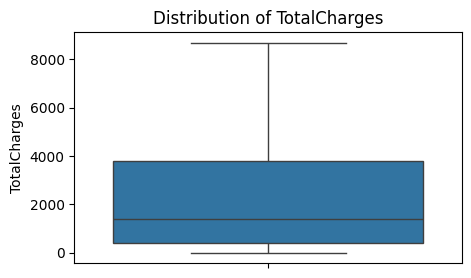

In [92]:
plot_boxplot(df,"TotalCharges")

Heatmap Showing Correlations Between Numerical Features

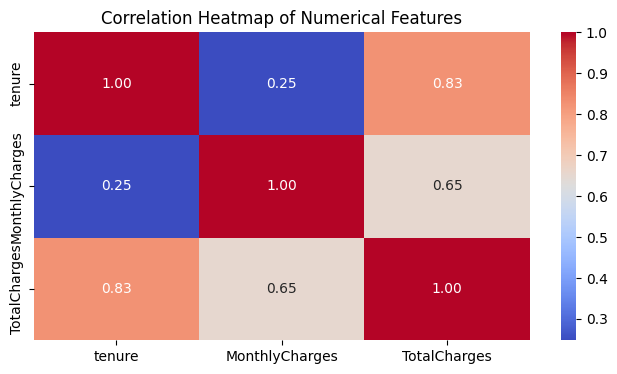

In [93]:
# --- Correlation Heatmap for Numerical Columns ---

# Create a figure with a wider layout for readability
plt.figure(figsize=(8, 4))

# Plot a heatmap of correlations between selected numerical columns
sns.heatmap(
    df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(),  # compute correlation matrix
    annot=True,          # display correlation values on the heatmap
    cmap="coolwarm",     # color palette (red–blue gradient)
    fmt=".2f"            # format numbers to 2 decimal places
)

# Add title for clarity
plt.title("Correlation Heatmap of Numerical Features")

# Display the plot
plt.show()


Analysis of Categorical Variables

In [94]:
#view all columns
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [95]:
#view types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Countplot for categorical variables

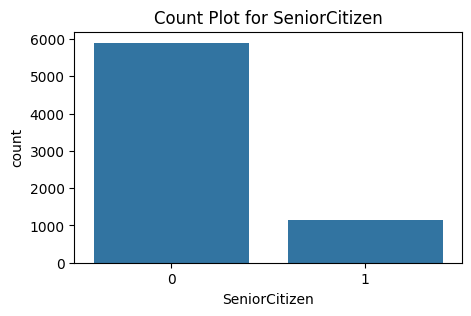

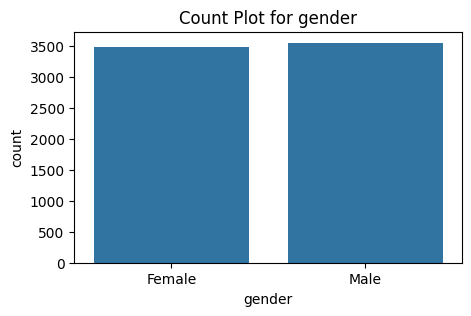

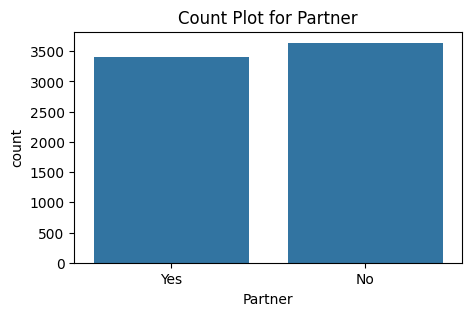

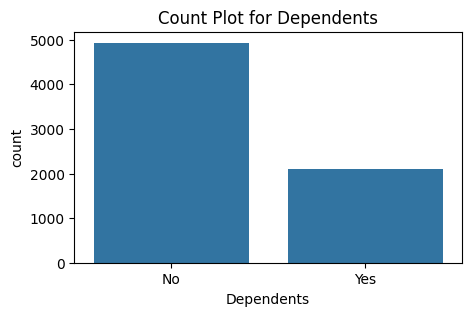

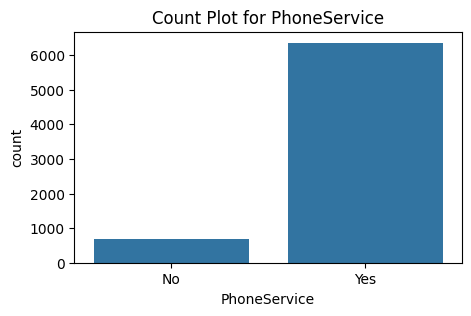

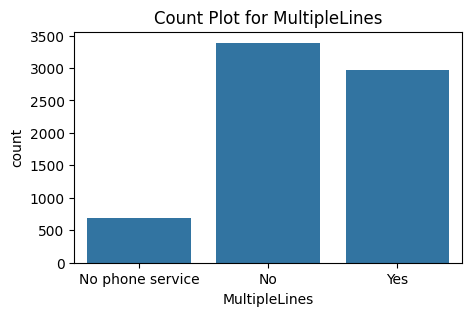

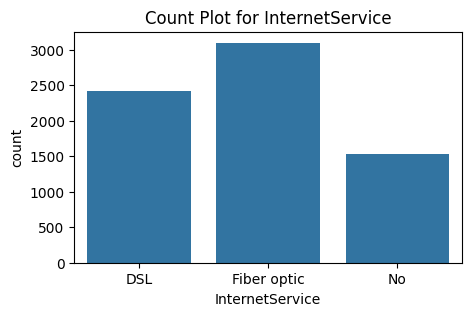

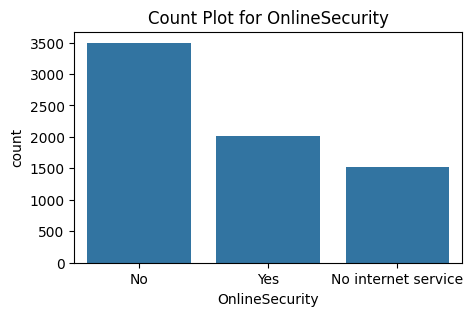

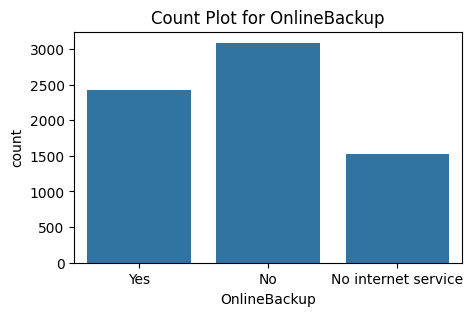

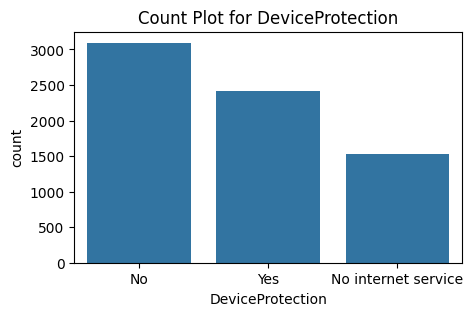

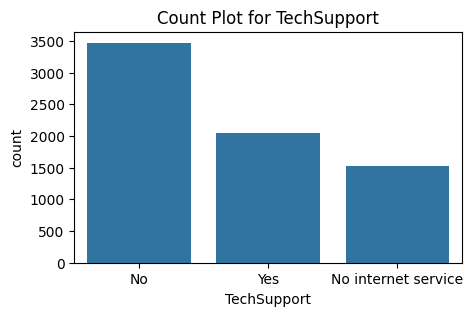

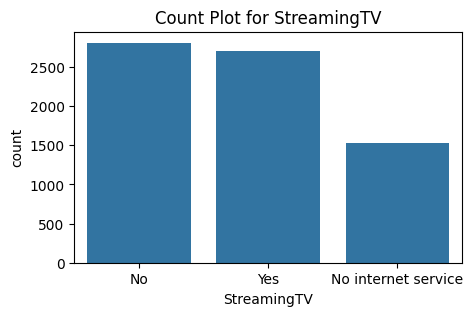

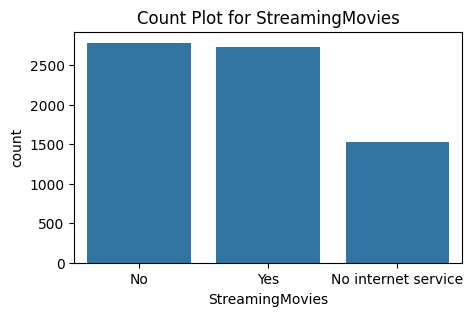

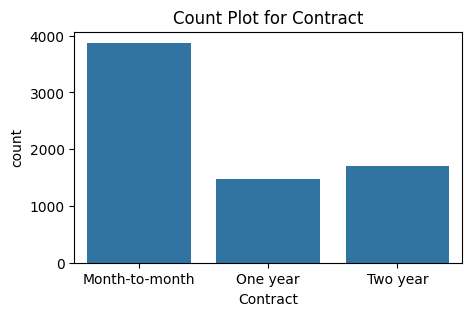

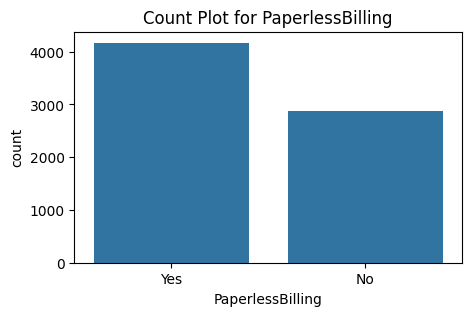

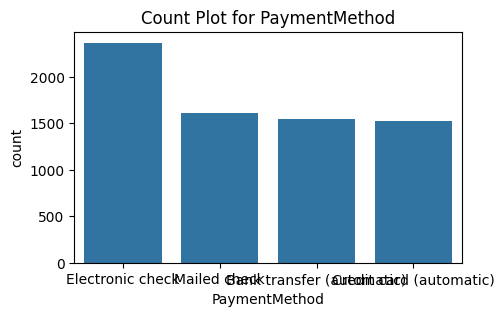

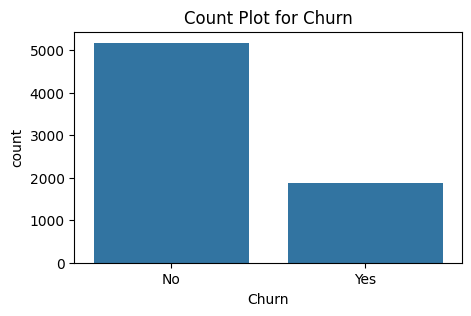

In [96]:
# ---------------------------------------------
# Generate count plots for all categorical columns
# ---------------------------------------------

# Select all columns with data type 'object' (categorical features)
object_cols = df.select_dtypes(include="object").columns.to_list()

# Include "SeniorCitizen" manually since it is encoded as a number but actually categorical
object_cols = ["SeniorCitizen"] + object_cols

# Loop through each categorical column and create a count plot
for col in object_cols:
    plt.figure(figsize=(5, 3))  # Set figure size
    sns.countplot(x=df[col])    # Count the occurrences of each category in the column
    plt.title(f"Count Plot for {col}")  # Add a title for clarity
    plt.show()  # Display the plot


**4. Data preprocessing**

In [97]:
#view first 5 rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Label encoding - convert categorical text data into numerical values so that algorithms can process them.

In [98]:
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

/tmp/ipython-input-3368294369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})


In [99]:
df.head() #view again

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [100]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Label encoding the categorical features


In [101]:
#recognize colums with object datatype
object_columns = df.select_dtypes(include = "object").columns

In [102]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [103]:
# Create a dictionary that will store the fitted encoders for later use
encoders = {}

# Loop through each categorical column and apply label encoding
for column in object_columns:

    # Create a new LabelEncoder instance for the current column
    label_encoder = LabelEncoder()

    # Convert the text categories into numerical labels
    df[column] = label_encoder.fit_transform(df[column])

    # Store the trained encoder so it can be reused during inference
    encoders[column] = label_encoder

# Save all trained encoders into a pickle file for future model prediction
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [104]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [105]:
df.head()
#view agian

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Splitting the dataset into training and testing sets

In [106]:
X = df.drop(columns =['Churn'])
y = df["Churn"]

In [107]:
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [108]:
# Divide the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [109]:
#view rows
print(y_train.shape)

(5634,)


In [110]:
#view split
print(y_train.value_counts())


Churn
0    4138
1    1496
Name: count, dtype: int64


SMOTE – A Technique to Oversample Minority Classes

In [111]:
smote = SMOTE(random_state = 42)

In [112]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [113]:
print(y_train_smote.shape)

(8276,)


**5. Model training**


Training the model with the standard hyperparameters

In [114]:
# Create a collection of machine learning models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


In [115]:
# dictionary to keep track of validation scores for each model
cv_scores = {}

# run 5-fold cross-validation for every model in the dictionary
for model_name, model in models.items():

    print(f"Evaluating {model_name} using default settings")

    # perform 5-fold cross-validation and return accuracy scores
    scores = cross_val_score(
        model, X_train_smote, y_train_smote,
        cv=5, scoring="accuracy"
    )

    # store the list of accuracy scores for this model
    cv_scores[model_name] = scores

    # display the model's average accuracy across the folds
    print(f"{model_name} mean CV accuracy: {np.mean(scores):.2f}")
    print("_"*60)


Evaluating Decision Tree using default settings
Decision Tree mean CV accuracy: 0.78
____________________________________________________________
Evaluating Random Forest using default settings
Random Forest mean CV accuracy: 0.84
____________________________________________________________
Evaluating XGBoost using default settings
XGBoost mean CV accuracy: 0.83
____________________________________________________________


In [116]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

Among the models tested with default parameters, Random Forest delivers the best accuracy

In [117]:
rfc = RandomForestClassifier(random_state = 42)

In [118]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [119]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


**6. Model evaluation**

In [120]:
# --- Evaluate the model using the test dataset ---
y_test_pred = rfc.predict(X_test)

# Print evaluation metrics
print("Test Accuracy:\n", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy:
 0.7785663591199432

Confusion Matrix:
 [[878 158]
 [154 219]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [122]:
X.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [125]:
#save trained model as pickle file
model_data = {"model": rfc, "features_names" : X.columns.tolist()}
with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)
#

**7. Retrieve the saved model and construct a predictive pipeline**

In [126]:
# Load the previously saved model and metadata from the pickle file
with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)   # Deserialize the file contents into a Python dictionary

# Extract the trained model from the loaded dictionary
loaded_model = model_data["model"]

# Extract the list of feature names used during model training
feature_names = model_data["features_names"]


In [127]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [129]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [131]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}
# Convert the dictionary of user inputs into a single-row DataFrame
# Wrapping input_data in a list ensures DataFrame creates one row instead of treating keys as rows
input_data_df = pd.DataFrame([input_data])


# Load the saved label encoders used during training
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

print(input_data_df.head())   # Display the unencoded input for verification


# Apply label encoding to each categorical column using the previously saved encoders
for column, encoder in encoders.items():
    # Transform the raw categorical values into the numerical labels used during training
    input_data_df[column] = encoder.transform(input_data_df[column])

# --- Make a prediction using the loaded model ---
prediction = loaded_model.predict(input_data_df)           # Gives class: 0 or 1
pred_prob = loaded_model.predict_proba(input_data_df)      # Gives probability for both classes

print("Raw prediction output:", prediction)                # Debug print


# --- Display the final results clearly ---
result_label = "Churn" if prediction[0] == 1 else "No Churn"
probability = pred_prob[0][1]   # Probability of class '1' (Churn)

print(f"\nFinal Prediction: {result_label}")
print(f"Churn Probability: {probability:.4f}")


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  
Raw prediction output: [0]

Final Prediction: No Churn
Churn Probability: 0.2200
